<a href="https://colab.research.google.com/github/Satyaram-k/satyaram_INFO5731_Spring2020/blob/main/Assignments/INFO5731_Assignment_Three_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
# Write your code here

#imports
import pandas as pd
import urllib.request
import re
import requests
import string
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
import nltk

# opening file
df = pd.read_csv('review_text.csv')
df['Review'] = df['Review'].fillna("")
df.head()

,Unnamed: 0,Review
0,0,Purchased this product advertised as fully unl...
1,1,I was feeling a bit skeptical after I placed m...
2,2,Phone was not unlocked could it use it
3,3,The screen came cracked and popped out of the ...
4,4,This is the best experience I have ever had wi...


In [ ]:
# Text cleaning

# Lower casing
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing Punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]',"")

# Removing Stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

# Frequent word removal
freq=pd.Series(' '.join(df['Review']).split()).value_counts()[:10]
freq=list(freq.index)
df['Review'] = df['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in freq))

# Rare word removal
freq=pd.Series(' '.join(df['Review']).split()).value_counts()[-10:]
freq=list(freq.index)
df['Review'] = df['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in freq))

# Stemming
st=PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# Lemmetization
nltk.download('wordnet')
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Tokenization
nltk.download('punkt')
df['Review'] = df['Review'].apply(lambda x: TextBlob(x).words)

# Writing clean text to new csv
df.to_csv('clean_data.csv')

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,Review
0,0,"[purchas, product, advertis, fulli, unlock, in..."
1,1,"[feel, bit, skeptic, place, order, proven, wro..."
2,2,"[unlock, could, use]"
3,3,"[screen, crack, pop, frame, hope, return, proc..."
4,4,"[best, experi, ever, buy, renew, origin, box, ..."


In [ ]:
from textblob import TextBlob
from textblob import Word
joint_sent = [" ".join(sublist) for sublist in df['Review']]
joint_text = " ".join (joint_sent)
def n_gram(text, m):
    blob = TextBlob(text)
    n_gram1 = blob.ngrams(n=m)
    print(str(m) + "_gram:", n_gram1)

n_gram(joint_text, 3)

3_gram: [WordList(['purchas', 'product', 'advertis']), WordList(['product', 'advertis', 'fulli']), WordList(['advertis', 'fulli', 'unlock']), WordList(['fulli', 'unlock', 'insert']), WordList(['unlock', 'insert', 'sim']), WordList(['insert', 'sim', 'card']), WordList(['sim', 'card', 'work']), WordList(['card', 'work', 'contact']), WordList(['work', 'contact', 'servic']), WordList(['contact', 'servic', 'provid']), WordList(['servic', 'provid', 'check']), WordList(['provid', 'check', 'imei']), WordList(['check', 'imei', 'number']), WordList(['imei', 'number', 'report']), WordList(['number', 'report', 'still']), WordList(['report', 'still', 'lock']), WordList(['still', 'lock', 'origin']), WordList(['lock', 'origin', 'carrier']), WordList(['origin', 'carrier', 'good']), WordList(['carrier', 'good', 'condit']), WordList(['good', 'condit', 'couldnt']), WordList(['condit', 'couldnt', 'use']), WordList(['couldnt', 'use', 'servic']), WordList(['use', 'servic', 'provid']), WordList(['servic', 'p

In [ ]:
# (1) Counting the frequency of all the N-grams (N=3)

with open('clean_data.csv', encoding="utf8", errors='ignore') as f:
    sentence = f.read()

import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['Review']:
    words_sentence.append(sentence)
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

# Count the frequency of all the N-grams (N=3)
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
tri_grams_dict = dict(frequency_dist)
for word in tri_grams_dict:
    print( str(word) + ':'+ str(frequency_dist[word]))

Streaming output truncated to the last 5000 lines.
('incluso', 'parecen', 'grieta'):1
('parecen', 'grieta', 'se'):1
('grieta', 'se', 'notan'):1
('se', 'notan', 'hasta'):1
('notan', 'hasta', 'con'):1
('hasta', 'con', 'pantalla'):1
('con', 'pantalla', 'encendida'):1
('pantalla', 'encendida', 'sencillament'):1
('encendida', 'sencillament', 'llevé'):1
('sencillament', 'llevé', 'una'):1
('llevé', 'una', 'grata'):1
('una', 'grata', 'sorpresa'):3
('grata', 'sorpresa', 'al'):1
('sorpresa', 'al', 'recibir'):1
('al', 'recibir', 'teléfono'):1
('recibir', 'teléfono', 'prácticament'):1
('teléfono', 'prácticament', 'nuevo'):1
('prácticament', 'nuevo', 'traía'):1
('nuevo', 'traía', 'un'):1
('traía', 'un', 'simpl'):1
('un', 'simpl', 'roce'):1
('simpl', 'roce', 'en'):1
('roce', 'en', 'una'):1
('una', 'orilla', 'pero'):1
('orilla', 'pero', 'apena'):1
('pero', 'apena', 'se'):1
('apena', 'se', 'nota'):1
('nota', 'batería', 'e'):1
('batería', 'e', 'una'):1
('e', 'una', 'joya'):1
('una', 'joya', 'llegó'):1


In [ ]:
# (2) Calculating the probabilities of all the bigrams in the dataset

from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
    print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

Streaming output truncated to the last 5000 lines.
('opcion', 'allá'):0.3333333333333333
('allá', 'afuera'):1.0
('afuera', 'puedan'):1.0
('puedan', 'sustituir'):0.5
('sustituir', 'lo'):1.0
('lo', 'vienenmuy'):0.003257328990228013
('vienenmuy', 'satisfecho'):1.0
('satisfecho', 'por'):0.09523809523809523
('precio', 'lo'):0.029411764705882353
('lo', 'comprado'):0.003257328990228013
('comprado', 'recomendado'):0.07692307692307693
('recomendado', 'teléfono'):0.0625
('rayón', 'problema'):0.043478260869565216
('fue', 'cuando'):0.02702702702702703
('cuando', 'le'):0.1
('le', 'metí'):0.009708737864077669
('metí', 'sim'):1.0
('sim', 'comenzamo'):0.00909090909090909
('comenzamo', 'hacer'):1.0
('hacer', 'prueba'):0.09090909090909091
('prueba', 'en'):0.5
('la', 'llamada'):0.0196078431372549
('escuchaba', 'voz'):0.3333333333333333
('voz', 'como'):0.5
('como', 'robot'):0.009174311926605505
('robot', 'como'):1.0
('como', 'tenía'):0.009174311926605505
('tenía', 'una'):0.05405405405405406
('falla', 'int

In [ ]:
# (3) Extracting all the noun phrases and calculating the relative probabilities of each review

from textblob import TextBlob
import pandas as pd
nltk.download('brown')
nltk.download('punkt')
# open file
sentence = open('clean_data.csv', "r")
blob = TextBlob(sentence.read())
# Extract all the noun phrases
noun_phrase = blob.noun_phrases

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Calculating the relative probabilities of each review in terms of other reviews

noun_df = pd.DataFrame(columns = noun_phrase)
cnt = 0
for index, row in df.iterrows():
    sub_prob_lst = []
    sub_blob = TextBlob(str(row['Review']))
    sub_noun_phrase = sub_blob.noun_phrases
    
    for idx in range(len(noun_phrase)):
        word = noun_phrase[idx]
        sub_prob_lst.append(sub_blob.noun_phrases.count(word)/blob.noun_phrases.count(word))
    a_series = pd.Series(sub_prob_lst, index = noun_df.columns)
    noun_df = noun_df.append(a_series, ignore_index = True)
noun_df

,unnamed,review,[ 'purchas,[ 'feel,[ 'unlock,[ 'screen,[ 'best,[ 'care,[ 'fought,[ 'box,...,[ 'regres,[ 'muy,[ 'funciona,[ 'todo,[ 'touch,[ 'ok,[ ],[ 'vien,[ 'buen,[ 'muy
0,0.0,0.0,0.030303,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.00,0.000000,0.000000
1,0.0,0.0,0.000000,0.2,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.00,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.2,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.00,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.028571,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.00,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.083333,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.125,0.000000,0.00,0.000000,0.000000
3067,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.029412,0.00,0.000000,0.000000
3068,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.25,0.000000,0.000000
3069,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.00,0.083333,0.000000


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
# 2-1 Build the documents-terms weights (tf*idf) matrix bold text
df2 = open('review_text.csv',"r")
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer()
response = vectorize.fit_transform(df2)
df3 = pd.DataFrame(response.toarray(), columns=vectorize.get_feature_names())
df3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0km,10,100,1000,100000,1001,1002,1003,...,éste,été,être,ñugar,óptimas,única,únicamente,único,únicos,útil
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.116091,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3380,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3381,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3382,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 2-2 rank the documents by using cosine similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# opening file
df4 = pd.read_csv('review_text.csv')
df4['Review'] = df4['Review'].fillna("")

# a query
X_list = "The iPhone 11 was a big surprise, packing more advanced technology (namely in the camera capabilities and the processing power under the hood) at a lower cost than the iPhone XR's price in 2018. It combines a large 6.1-inch display with a premium-feeling body, and comes in an array of colors too."
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}

def compute_vector(X_set, Y_set):
    rvector = X_set.union(Y_set)
    l1 =[];l2 =[]
    for w in rvector: 
        if w in X_set: l1.append(1)
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0)
    return rvector, l1, l2
 
def compute_cosine(rvector, l1, l2):
    c = 0
    for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    return cosine

# cosine similarity
similarity_list = []
for sentence in df4['Review']:
    Y_list = sentence
    Y_set = {w for w in Y_list if not w in sw}
    rvector, l1, l2 = compute_vector(X_set, Y_set)
    try:
        similarity = compute_cosine(rvector, l1, l2)
    except ZeroDivisionError:
        similarity = 'None'
    similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df4['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,Purchased this product advertised as fully unl...,0.711556
1,I was feeling a bit skeptical after I placed m...,0.790263
2,Phone was not unlocked could it use it,0.567962
3,The screen came cracked and popped out of the ...,0.649234
4,This is the best experience I have ever had wi...,0.739693
...,...,...
3066,Ok,0.127
3067,,None
3068,"No viene el cargador, y en especificación dice...",0.556487
3069,Buen producto,0.4445


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [ ]:
# Upgrading Gensim
!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 80.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# opening file
df = pd.read_csv('review_text.csv')
df['Review'] = df['Review'].fillna("")
df.head()

,Unnamed: 0,Review
0,0,Purchased this product advertised as fully unl...
1,1,I was feeling a bit skeptical after I placed m...
2,2,Phone was not unlocked could it use it
3,3,The screen came cracked and popped out of the ...
4,4,This is the best experience I have ever had wi...


In [ ]:
import pandas as pd
import urllib.request
import re
import requests
import string
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
import nltk

# Text cleaning

# Lower casing
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing Punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]',"")

# Removing Stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

# Frequent word removal
freq=pd.Series(' '.join(df['Review']).split()).value_counts()[:10]
freq=list(freq.index)
df['Review'] = df['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in freq))

# Rare word removal
freq=pd.Series(' '.join(df['Review']).split()).value_counts()[-10:]
freq=list(freq.index)
df['Review'] = df['Review'].apply(lambda x:" ".join(x for x in x.split() if x not in freq))

# Stemming
st=PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# Lemmetization
nltk.download('wordnet')
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Tokenization
nltk.download('punkt')
df['Review'] = df['Review'].apply(lambda x: TextBlob(x).words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentence = list(df["Review"])

# (1) Training the model

from gensim.models import Word2Vec
model = Word2Vec(sentences = sentence, vector_size = 300, window = 3)

In [ ]:
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index )
print(words)

Word2Vec(vocab=1313, vector_size=300, alpha=0.025)
['work', 'screen', 'en', 'scratch', 'like', 'good', 'buy', 'con', 'love', 'one', 'look', 'lo', 'use', 'get', 'purchas', '100', 'condit', 'appl', 'life', 'muy', 'un', 'brand', 'im', 'would', 'day', 'time', 'everyth', 'e', 'got', 'al', 'batería', 'even', 'pero', 'unlock', 'product', 'charger', 'perfect', '11', 'back', 'issu', 'happi', 'amazon', 'protector', 'return', 'se', 'realli', 'bien', 'price', 'come', 'bought', 'recommend', 'well', 'didnt', 'camera', 'charg', 'could', 'dont', 'receiv', 'refurbish', 'nuevo', 'problem', 'excelent', 'box', 'seller', 'expect', 'far', 'also', 'month', 'money', 'una', 'ive', 'arriv', 'go', 'todo', 'amaz', 'order', 'llegó', 'fine', 'producto', 'sin', 'origin', 'review', 'fast', 'still', 'pantalla', 'teléfono', 'first', 'phone', 'por', 'definit', 'renew', 'sim', 'como', 'llego', 'call', 'thing', 'le', 'littl', 'funciona', 'worth', 'para', 'say', 'need', 'much', 'tien', 'mi', 'better', 'card', 'replac', 'se

In [ ]:
# access vector for one word
model.wv['screen']

array([-5.44687621e-02,  2.53114045e-01, -8.69025514e-02,  2.01224178e-01,
        7.12340102e-02, -2.95332909e-01,  1.96924150e-01,  4.62461144e-01,
        1.29328445e-01, -2.18611181e-01, -1.50396777e-02, -1.33311629e-01,
        1.24290749e-01, -1.50435403e-01, -3.06974560e-01, -1.12790257e-01,
        1.38630122e-01, -3.30930972e-03,  1.02855355e-01, -3.99872735e-02,
       -9.21657756e-02,  1.70803796e-02,  2.76134461e-01, -7.29592890e-02,
        2.16878474e-01, -2.72370409e-02, -3.65840137e-01, -1.19045779e-01,
       -2.68800426e-02, -2.38177195e-01, -4.37443033e-02, -2.05657139e-01,
       -2.24013180e-01, -7.95878470e-02, -1.70895010e-01,  6.56067878e-02,
        9.23649147e-02, -2.17423052e-01, -1.14123948e-01,  2.10560951e-02,
       -4.48029898e-02,  1.08750761e-01, -6.18713256e-03, -7.88688511e-02,
        2.18200430e-01,  2.05486313e-01,  2.71443933e-01,  1.83456942e-01,
       -3.54494043e-02,  2.17846617e-01,  4.77519780e-02,  1.41527012e-01,
       -1.37972578e-01,  

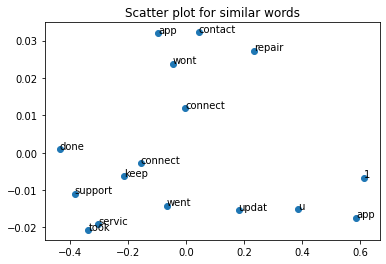

In [ ]:
# (2) Visualising the model

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
import numpy as np
topn = 4
batch_size = 4
unique_words = list(model.wv.index_to_key)
sampled_words = random.choices(unique_words, k=batch_size)

all_words = []
two_dimensional_data = []
for sample_word in sampled_words:
    similar_words = model.wv.most_similar(sample_word, topn=topn)
    similar_words = [word[0] for word in similar_words]
    word_vectors = np.array([model.wv[word] for word in similar_words])

    all_words.extend(similar_words)
    two_dimensional_data.extend(PCA(random_state=0).fit_transform(word_vectors)[:,:2])

x = [point[0] for point in two_dimensional_data]
y = [point[1] for point in two_dimensional_data]

plt.scatter(x, y)
plt.title('Scatter plot for similar words')

for i in range(len(all_words)):
    plt.annotate(all_words[i], (x[i], y[i]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file

# Link: https://github.com/Satyaram-k/satyaram_INFO5731_Spring2020/blob/main/Assignments/review_text_training_%26_evaluation_data.csv

